In [1]:
import os
import sys

repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
src_path = os.path.join(repo_root, "src")

if src_path not in sys.path:
    sys.path.insert(0, src_path)

print("Added to sys.path:", src_path)


Added to sys.path: /home/lleisner/projects/hands-on-neuroai/src


In [ ]:
import torch
import matplotlib.pyplot as plt

from hands_on_neuroai.data.mnist import MNISTConfig, build_permuted_mnist_loaders
from hands_on_neuroai.models.factory import build_model_for_perm_mnist
from hands_on_neuroai.training.perm_mnist import train_model_on_perm_mnist

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device



device(type='cuda')

In [3]:
num_tasks = 50
steps_per_task = 200
hidden_dim = 256
context_type = "binary"
batch_size = 128

In [4]:
mnist_cfg = MNISTConfig(root="data")
train_loaders, test_loaders = build_permuted_mnist_loaders(
    config=mnist_cfg,
    num_tasks=num_tasks,
    batch_size=batch_size,
    base_seed=0,
)

len(train_loaders), len(test_loaders)


(50, 50)

In [5]:
baseline = build_model_for_perm_mnist(
    context_type="none",
    hidden_dim=hidden_dim,
    num_tasks=num_tasks,
    base_seed=0,
    device=device,
)

psp = build_model_for_perm_mnist(
    context_type=context_type,
    hidden_dim=hidden_dim,
    num_tasks=num_tasks,
    base_seed=0,
    device=device,
)


In [6]:
base_steps, base_acc = train_model_on_perm_mnist(
    model=baseline, 
    train_loaders=train_loaders, 
    test_loaders=test_loaders, 
    num_tasks=num_tasks, 
    steps_per_task=steps_per_task, 
    lr=1e-3, eval_interval=steps_per_task//5, 
    device=device, 
    verbose=1)

psp_steps, psp_acc = train_model_on_perm_mnist(
    model=psp, 
    train_loaders=train_loaders, 
    test_loaders=test_loaders, 
    num_tasks=num_tasks, 
    steps_per_task=steps_per_task, 
    lr=1e-3, eval_interval=steps_per_task//5, 
    device=device, 
    verbose=1)

Tasks:   0%|          | 0/50 [00:00<?, ?it/s]

Training completed.


Tasks:   0%|          | 0/50 [00:00<?, ?it/s]

Training completed.


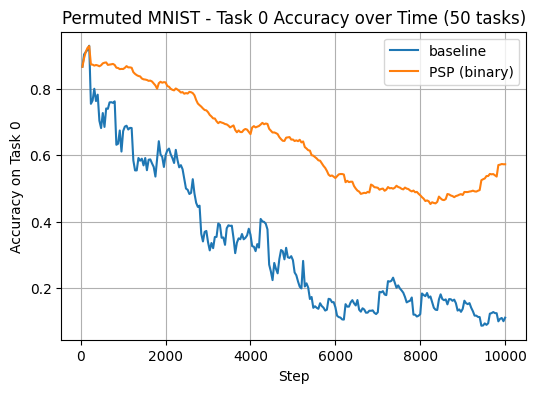

In [7]:
plt.figure(figsize=(6,4))
plt.plot(base_steps, base_acc, label="baseline")
plt.plot(psp_steps, psp_acc, label="PSP (binary)")
plt.xlabel("Step")
plt.ylabel("Accuracy on Task 0")
plt.title(f"Permuted MNIST - Task 0 Accuracy over Time ({num_tasks} tasks)")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
from hands_on_neuroai.training.metrics import collect_hidden_activations
from sklearn.decomposition import PCA
import numpy as np



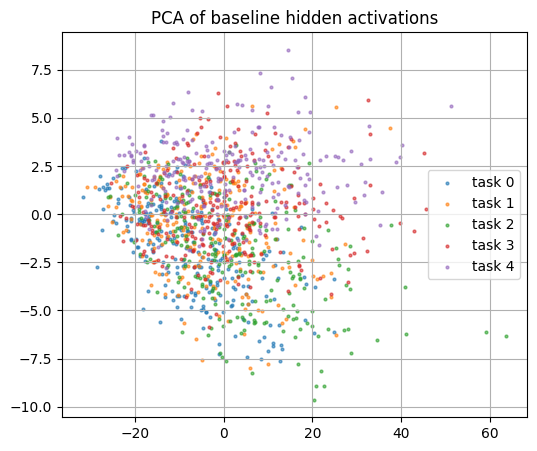

In [9]:


A_base, t_base = collect_hidden_activations(
    model=baseline,
    hidden_module=baseline.fc1,
    loaders=train_loaders,
    num_tasks=num_tasks,
    num_samples_per_task=200,
    device=device,
)

pca = PCA(n_components=2)
A2 = pca.fit_transform(A_base)

plt.figure(figsize=(6,5))
for t in range(5):
    mask = (t_base == t)
    plt.scatter(A2[mask,0], A2[mask,1], s=4, alpha=0.6, label=f"task {t}")

plt.title("PCA of baseline hidden activations")
plt.legend()
plt.grid(True)
plt.show()


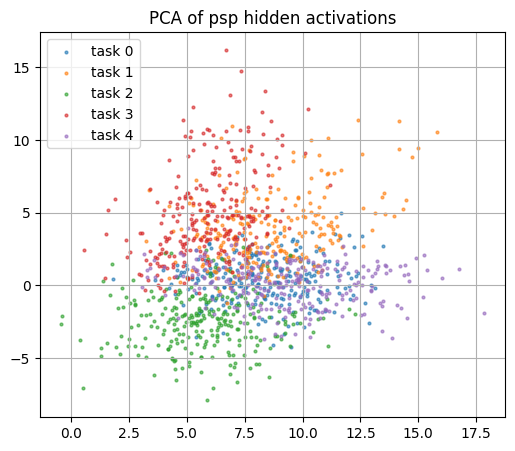

In [10]:

A_psp, t_psp = collect_hidden_activations(
    model=psp,
    hidden_module=psp.fc1,
    loaders=train_loaders,
    num_tasks=num_tasks,
    num_samples_per_task=200,
    device=device,
)

pca = PCA(n_components=2)
A2 = pca.fit_transform(A_psp)

plt.figure(figsize=(6,5))
for t in range(5):
    mask = (t_psp == t)
    plt.scatter(A2[mask,0], A2[mask,1], s=4, alpha=0.6, label=f"task {t}")

plt.title("PCA of psp hidden activations")
plt.legend()
plt.grid(True)
plt.show()